In [15]:
import pandas as pd
import time, datetime
from jqdatasdk import *
#jqdata的账号密码
auth('13644220323', 'Hujinhe200102014')
df_data_5minute= get_price('AU9999.XSGE',   start_date='2022-10-08', end_date='2023-10-15', frequency='5m')


In [16]:
df_data_5minute.head()


,open,close,high,low,volume,money
2022-10-10 09:05:00,398.00,396.24,398.00,396.12,8620.0,3.421845e+09
2022-10-10 09:10:00,396.24,394.94,396.36,394.88,5751.0,2.274467e+09
2022-10-10 09:15:00,394.94,395.34,395.42,394.94,2803.0,1.107768e+09
2022-10-10 09:20:00,395.34,395.34,395.46,395.00,2032.0,8.031055e+08
2022-10-10 09:25:00,395.34,395.36,395.40,395.20,1277.0,5.047959e+08


In [17]:
df_data_5minute

,open,close,high,low,volume,money
2022-10-10 09:05:00,398.00,396.24,398.00,396.12,8620.0,3.421845e+09
2022-10-10 09:10:00,396.24,394.94,396.36,394.88,5751.0,2.274467e+09
2022-10-10 09:15:00,394.94,395.34,395.42,394.94,2803.0,1.107768e+09
2022-10-10 09:20:00,395.34,395.34,395.46,395.00,2032.0,8.031055e+08
2022-10-10 09:25:00,395.34,395.36,395.40,395.20,1277.0,5.047959e+08
...,...,...,...,...,...,...
2023-10-14 02:10:00,465.44,465.58,465.68,465.40,1046.0,4.869844e+08
2023-10-14 02:15:00,465.60,465.48,465.62,465.44,544.0,2.532426e+08
2023-10-14 02:20:00,465.48,465.56,465.76,465.46,621.0,2.891382e+08
2023-10-14 02:25:00,465.58,465.46,465.62,465.46,603.0,2.807215e+08


In [19]:
# df_data_5minute.drop('Unnamed: 0', axis=1, inplace=True)
# df_data_5minute

In [20]:
df=df_data_5minute
close = df['close']
df.drop(labels=['close'], axis=1,inplace = True)
df.insert(0, 'close', close)
df

,close,open,high,low,volume,money
2022-10-10 09:05:00,396.24,398.00,398.00,396.12,8620.0,3.421845e+09
2022-10-10 09:10:00,394.94,396.24,396.36,394.88,5751.0,2.274467e+09
2022-10-10 09:15:00,395.34,394.94,395.42,394.94,2803.0,1.107768e+09
2022-10-10 09:20:00,395.34,395.34,395.46,395.00,2032.0,8.031055e+08
2022-10-10 09:25:00,395.36,395.34,395.40,395.20,1277.0,5.047959e+08
...,...,...,...,...,...,...
2023-10-14 02:10:00,465.58,465.44,465.68,465.40,1046.0,4.869844e+08
2023-10-14 02:15:00,465.48,465.60,465.62,465.44,544.0,2.532426e+08
2023-10-14 02:20:00,465.56,465.48,465.76,465.46,621.0,2.891382e+08
2023-10-14 02:25:00,465.46,465.58,465.62,465.46,603.0,2.807215e+08


In [21]:
data_train =df.iloc[:int(df.shape[0] * 0.7), :]
data_test = df.iloc[int(df.shape[0] * 0.7):, :]
print(data_train.shape, data_test.shape)

(18914, 6) (8107, 6)


In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)

MinMaxScaler(feature_range=(-1, 1))

In [23]:
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [24]:
data_train

array([[-0.75165198, -0.7036629 , -0.70462046, -0.75242315, -0.50268367,
        -0.51545209],
       [-0.78744493, -0.7521344 , -0.74972497, -0.78676267, -0.6682634 ,
        -0.67798124],
       [-0.77643172, -0.78793721, -0.77557756, -0.78510108, -0.83840249,
        -0.84324745],
       ...,
       [ 0.7092511 ,  0.71027265,  0.70792079,  0.71919136, -0.95244416,
        -0.94753183],
       [ 0.70539648,  0.70917103,  0.70682068,  0.71365273, -0.91966295,
        -0.91141176],
       [ 0.70704846,  0.70476453,  0.70572057,  0.71420659, -0.9547527 ,
        -0.95009171]])

In [25]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
output_dim = 1
batch_size = 256
epochs = 60
seq_len = 5
hidden_size = 128


TIME_STEPS = 5
INPUT_DIM = 6

lstm_units = 64
X_train = np.array([data_train[i : i + seq_len, :] for i in range(data_train.shape[0] - seq_len)])
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0]- seq_len)])
X_test = np.array([data_test[i : i + seq_len, :] for i in range(data_test.shape[0]- seq_len)])
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18909, 5, 6) (18909,) (8102, 5, 6) (8102,)


In [26]:
inputs = Input(shape=(TIME_STEPS, INPUT_DIM))
#drop1 = Dropout(0.3)(inputs)

x = Conv1D(filters = 64, kernel_size = 1, activation = 'relu')(inputs)  #, padding = 'same'
#x = Conv1D(filters=128, kernel_size=5, activation='relu')(output1)#embedded_sequences
x = MaxPooling1D(pool_size = 5)(x)
x = Dropout(0.2)(x)

print(x.shape)



(None, 1, 64)


In [27]:
lstm_out = Bidirectional(LSTM(lstm_units, activation='relu'), name='bilstm')(x)
#lstm_out = LSTM(lstm_units,activation='relu')(x)
print(lstm_out.shape)

(None, 128)


In [28]:
output = Dense(1, activation='sigmoid')(lstm_out)
#output = Dense(10, activation='sigmoid')(drop2)

model = Model(inputs=inputs, outputs=output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 6)]            0         
                                                                 
 conv1d (Conv1D)             (None, 5, 64)             448       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 bilstm (Bidirectional)      (None, 128)               66048     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                             


Epoch 1/60

74/74 [==============================] - 2s 3ms/step - loss: 0.5070
Epoch 2/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1832
Epoch 3/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1695
Epoch 4/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1671
Epoch 5/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1668
Epoch 6/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1666
Epoch 7/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1664
Epoch 8/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1663
Epoch 9/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1662
Epoch 10/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1661
Epoch 11/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1660
Epoch 12/60
74/74 [==============================] - 0s 3ms/step - loss: 0.1659
Epoch 13/60
74/74 [============================

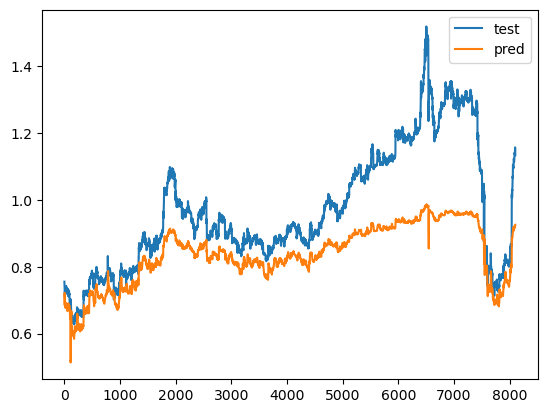

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train loss:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test loss:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()